Importing the necessary Libraries

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Extracting the Data


In [140]:
# Reading the data from the CSV file
dfr = pd.read_csv("scope_0.csv")

# Converting string representations to numeric data
dfr['x-axis'] = pd.to_numeric(dfr['x-axis'], errors='coerce')  # Converting 'VDS' column to numeric
dfr['2'] = -(pd.to_numeric(dfr['2'], errors='coerce'))    # Converting 'ID' column to numeric
dfr['1'] = (pd.to_numeric(dfr['1'], errors='coerce'))    # Converting 'ID' column to numeric



#Plotting The Data

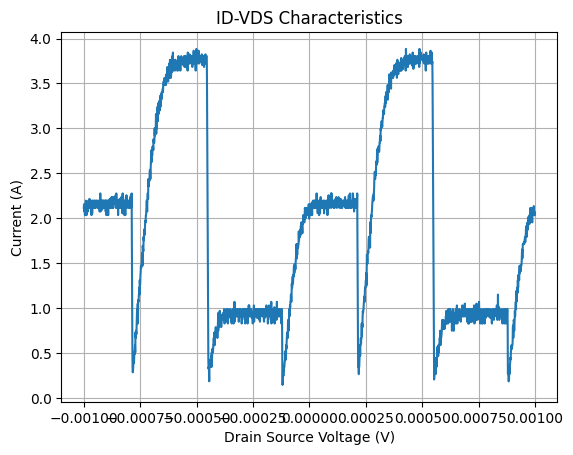

In [141]:
# Plotting the ID-VDS curves
plt.plot(dfr['x-axis'],dfr['2'])
plt.xlabel('Drain Source Voltage (V)')
plt.ylabel('Current (A)')
plt.title('ID-VDS Characteristics')
plt.grid(True)
plt.show()

#Scaling the samples


In [142]:
time = np.array((dfr["x-axis"]))
I_drainsource = np.array((dfr["2"]/500))
V_drainsource = np.array(dfr["1"])


Plotting the scaled samples


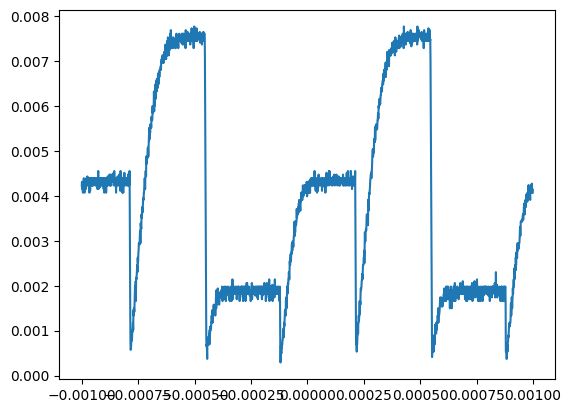

In [143]:
plt.plot(time,I_drainsource)


Defining interval for 3 segment extraction


In [144]:
chunk_size = len(I_drainsource[237:1197]) // 3

Ids = [I_drainsource[237:1197][i:i+chunk_size] for i in range(0, len(I_drainsource[237:1197]), chunk_size)]
Vds = [V_drainsource[237:1197][i:i+chunk_size] for i in range(0, len(V_drainsource[237:1197]), chunk_size)]
ti = [time[237:1197][i:i+chunk_size] for i in range(0, len(time[237:1197]), chunk_size)]

Checking the segments


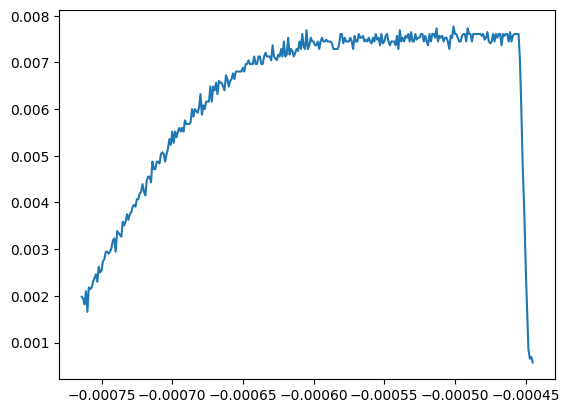

In [145]:
plt.plot(ti[0],Ids[0])

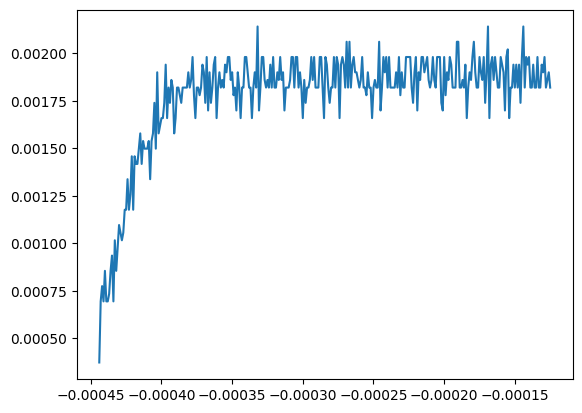

In [146]:
plt.plot(ti[1],Ids[1])

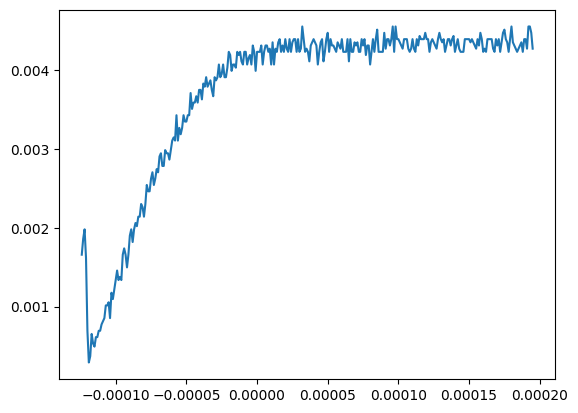

In [147]:
plt.plot(ti[2],Ids[2])

Trimming the samples to reduce Noises

In [148]:
arrays = [Vds, Ids, ti]
for arr in arrays:
    arr[2] = arr[2][12:]

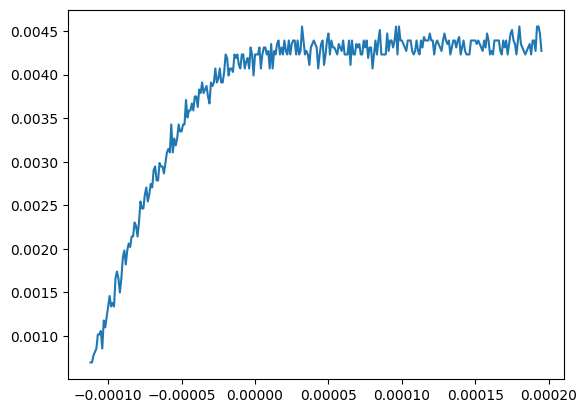

In [149]:
plt.plot(ti[2],Ids[2])

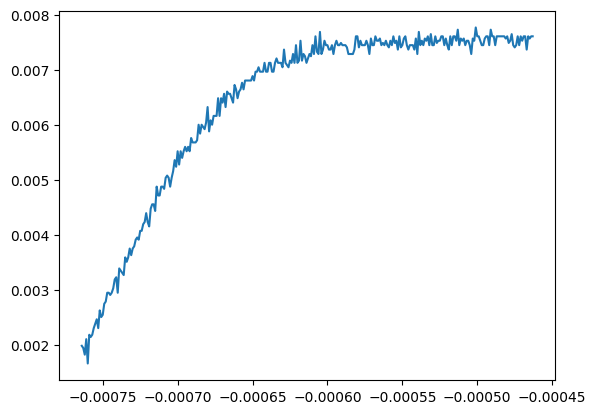

In [158]:
arrays = [Vds, Ids, ti]

for arr in arrays:
    arr[0] = arr[0][:-9]

plt.plot(ti[0],Ids[0])

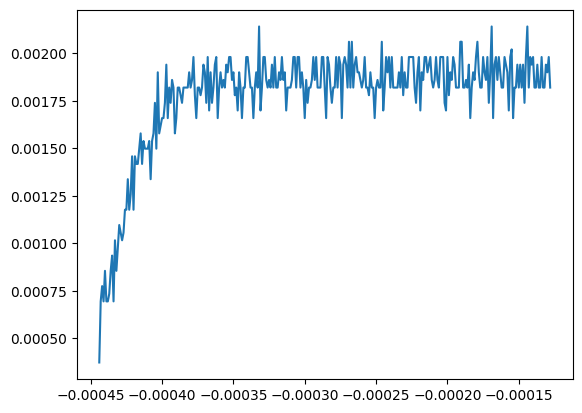

In [151]:
arrays = [Vds, Ids, ti]

for arr in arrays:
    arr[1] = arr[1][:-3]

plt.plot(ti[1],Ids[1])

#Plotting the Characteristics

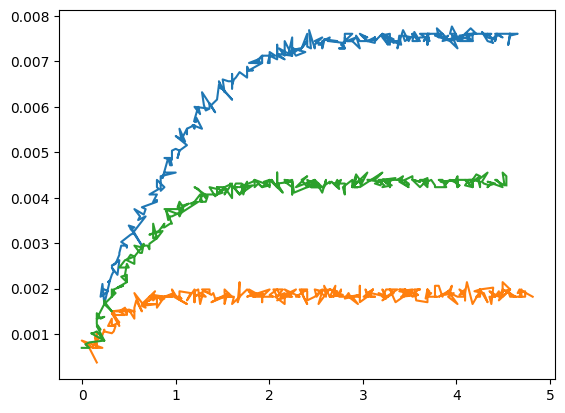

In [159]:
plt.plot(Vds[0],Ids[0])
plt.plot(Vds[1],Ids[1])
plt.plot(Vds[2],Ids[2])


#Defining the test function to evaluate parameters for VDS


In [153]:
def parametercalculation(V, vdsa,p,lambd,k):
  return (k * ((V * (p)) - ((p**2) / 2)) * (1 + (lambd * vdsa)))

In [170]:

def calculate_ids(vdsa, k, lamb, Vthr):
    Vgate = 3
    Vsat = Vgate - Vthr
    return parametercalculation(Vsat, vdsa,np.minimum(Vsat, vdsa),lamb,k)

def calculate_ids_35(vdsa, k, lamb, Vth):
    Vgs = 3.5
    Vsat = Vgs - Vth
    p = np.minimum(Vsat, vdsa)
    return parametercalculation(Vsat, vdsa,p,lamb,k)

def calculate_ids_4(vdsa, k, lamb, Vth):
    Vgs = 4
    Vsat = Vgs - Vth
    p = np.minimum(Vsat, vdsa)
    return parametercalculation(Vsat, vdsa,p,lamb,k)

params_1, params_cov_1 = curve_fit(calculate_ids, Vds[0], Ids[0])
print("For Vgs=3 : " ,params_1)

params_2, params_cov_2 = curve_fit(calculate_ids_4, Vds[2], Ids[2])
print("For Vgs=4 : ", params_2)

params_3, params_cov_3 = curve_fit(calculate_ids_35, Vds[1], Ids[1])
print("For Vgs=3.5 : ",params_3)


For Vgs=3 :  [0.00297809 0.02236112 0.84299317]
For Vgs=4 :  [0.00411355 0.01754999 2.59075851]
For Vgs=3.5 :  [0.00658472 0.01362263 2.76141367]


#Defining the main Function

In [161]:
def currentcalc(vds, k, lam, Vth, Vgs):
    return k * ((Vgs - Vth) * np.minimum(Vgs - Vth, vds) - 0.5 * np.minimum(Vgs - Vth, vds) ** 2) * (1 + lam * vds)

In [165]:
Vds_values = [Vds[0], Vds[1], Vds[2]]
params = [
    (0.00297809, 0.02236112, 0.84299317, 3),
    (0.00658472, 0.01362263, 2.76141367, 3.5),
    (0.00411355, 0.01754999, 2.59075851, 4)
]

ids_lists = [[currentcalc(i, *p) for i in Vds_values[j]] for j, p in enumerate(params)]


#Plotting the curve fit graph


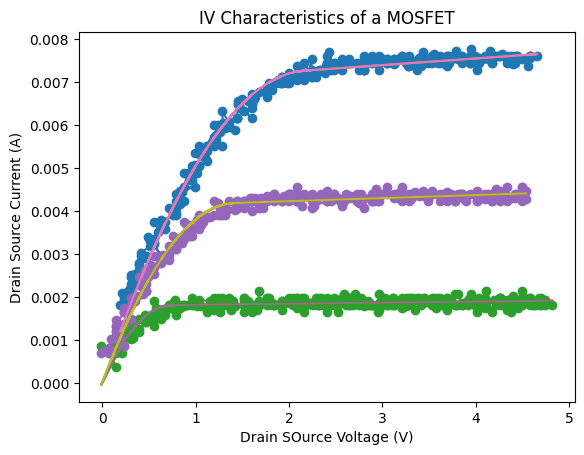

In [169]:

for i in range(3):
    plt.plot(Vds[i], Ids[i], label=f'Ids[{i}]',marker='o')
    plt.plot(Vds[i], ids_lists[i], label=f'ids{i+1}')
for i in range(3):
    plt.plot(Vds[i], ids_lists[i], label=f'ids{i+1}')
plt.xlabel('Drain SOurce Voltage (V)')
plt.ylabel('Drain Source Current (A)')
plt.title('IV Characteristics of a MOSFET')
plt.show()


Finding Absolute Values:


In [173]:
Lambd=(0.02236112+0.01362263+ 0.01754999)/3
print("Lambda= ",Lambd)
k= (0.00297809+0.00658472+0.00411355)/3
print("k = ",k)
Vth=(0.84299317+2.59075851+2.76141367)/3
print("Vth = ",Vth )


Lambda=  0.017844580000000002
k =  0.004558786666666666
Vth =  2.0650551166666666
